# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [1]:
# Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import scipy.stats

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [2]:
# Set parameters
mean = 50
standard_deviation = 5
sample_size = [10, 50, 500, 5000]

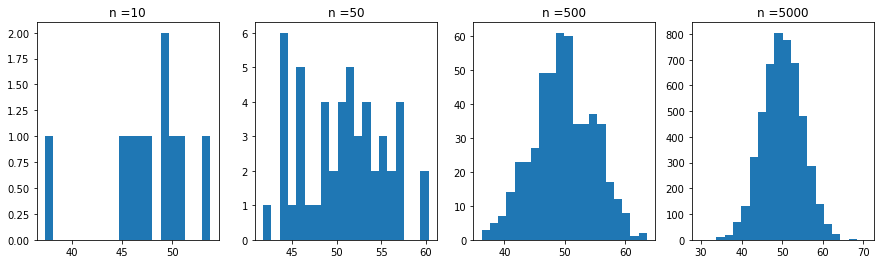

In [3]:
fig, ax = plt.subplots(1,4)

fig.set_figwidth(15)

bins = 20

for s in range(4):
    ax[s].set_title("n =" + str(sample_size[s]))
    ax[s].hist(norm.rvs(size=sample_size[s],loc=mean, scale=standard_deviation),bins)
               

<function matplotlib.pyplot.show(*args, **kw)>

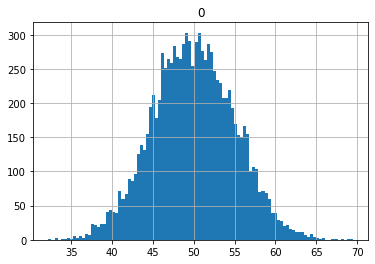

In [4]:
# Create dataset with parameters
population = pd.DataFrame(np.random.normal(mean, standard_deviation, size = 10000))
population.mean()
population.hist(bins=100)
plt.show



<function show at 0x1a193fd950>


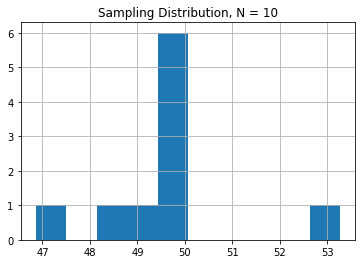

In [5]:
# Create samples
## Sample = 10
sample_means_10 = []
for i in range(0,10):
    sample_means_10.append(population.sample(n=10).mean().values[0])

pd.Series(sample_means_10).hist()
plt.title('Sampling Distribution, N = 10')
print(plt.show)


<function show at 0x1a193fd950>


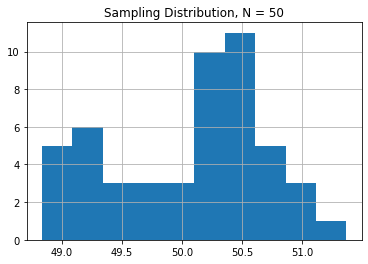

In [6]:
# Create samples
## Sample = 50
sample_means_50 = []
for i in range(0,50):
    sample_means_50.append(population.sample(n=50).mean().values[0])

pd.Series(sample_means_50).hist()
plt.title('Sampling Distribution, N = 50')
print(plt.show)

<function show at 0x1a193fd950>


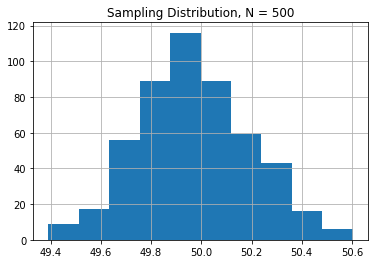

In [7]:
# Create samples
## Sample = 500
sample_means_500 = []
for i in range(0,500):
    sample_means_500.append(population.sample(n=500).mean().values[0])

pd.Series(sample_means_500).hist()
plt.title('Sampling Distribution, N = 500')
print(plt.show)

<function show at 0x1a193fd950>


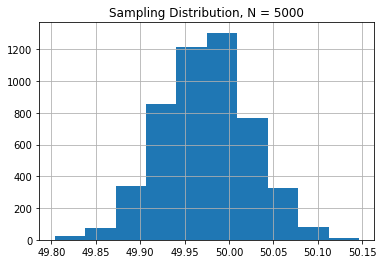

In [8]:
# Create samples
## Sample = 5000
sample_means_5000 = []
for i in range(0,5000):
    sample_means_5000.append(population.sample(n=5000).mean().values[0])

pd.Series(sample_means_5000).hist()
plt.title('Sampling Distribution, N = 5000')
print(plt.show)

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [9]:
"""
The more samples we draw from the population, the more the distribution of 
the sample means approaches a normal distribution. This helps us to
make inferences about the population.
"""

'\nThe more samples we draw from the population, the more the distribution of \nthe sample means approaches a normal distribution. This helps us to\nmake inferences about the population.\n'

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

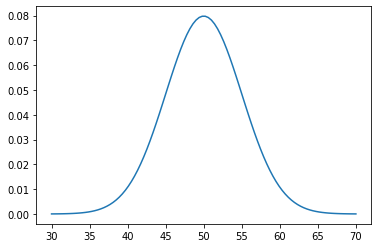

In [10]:
import math

x_min = 30
x_max = 70

mean = 50
standard_deviation = 5
sample_size = [10, 50, 500, 5000]

x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x,mean,standard_deviation)

plt.plot(x,y)
plt.show()


# Used as a reference: https://www.science-emergence.com/Articles/How-to-plot-a-normal-distribution-with-matplotlib-in-python-/

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

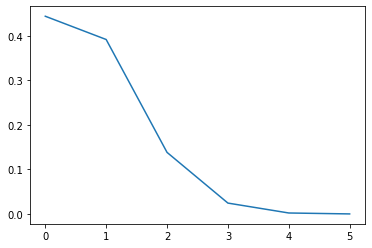

In [11]:
# Step 1
p = 0.15
n = 5
x = range(n+1)
# k = 1

dist = scipy.stats.binom(n,p)
plt.plot(x, dist.pmf(x))
# dist = scipy.stats.binom.pmf(n=n,p=p,k=k)
print(dist)
plt.show()

# Interpretation

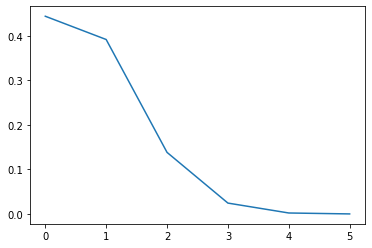

In [12]:
# Step 2 - Simple
k = range(n+1)

fig, ax = plt.subplots(1, 1)

dist = scipy.stats.binom(n,p)

plt.plot(k, dist.pmf(k=k))

plt.show()

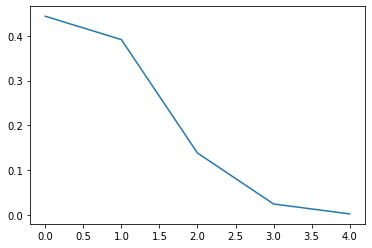

In [13]:
# Step 2 - Efficient
k = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(k, scipy.stats.binom.pmf(n=n,p=p,k=k))

plt.show()

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

#### Step 3: Explain what you observe from the plot above.

In [14]:
"""
X is the count of succeses which is ad clicks.
Y is the probability of obtaining the sucesss

The probability of one ad click is .4
For two clicks its about .15. For three clicks its about .03

When the sample size is 5,
the probability of 0 person clicking on the ad is 0.45 (and 5 not clicking)
the probability of 1 people clicking on the ad is 0.4 (and 4 not clicking)
the probability of 2 people clicking on the ad is 0.15 (and 3 not clicking)
the probability of 3 people clicking on the ad is 0.05 (and 2 not clicking)
the probability of 4 people clicking on the ad is almost 0 (and 1 not clicking)
the probability of 5 people clicking on the ad is almost 0 (and 0 not clicking)

"""

'\nX is the count of succeses which is ad clicks.\nY is the probability of obtaining the sucesss\n\nThe probability of one ad click is .4\nFor two clicks its about .15. For three clicks its about .03\n\nWhen the sample size is 5,\nthe probability of 0 person clicking on the ad is 0.45 (and 5 not clicking)\nthe probability of 1 people clicking on the ad is 0.4 (and 4 not clicking)\nthe probability of 2 people clicking on the ad is 0.15 (and 3 not clicking)\nthe probability of 3 people clicking on the ad is 0.05 (and 2 not clicking)\nthe probability of 4 people clicking on the ad is almost 0 (and 1 not clicking)\nthe probability of 5 people clicking on the ad is almost 0 (and 0 not clicking)\n\n'

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

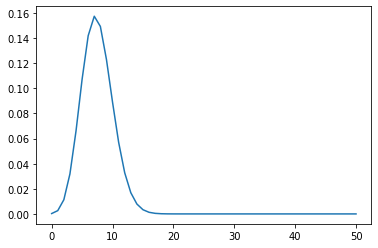

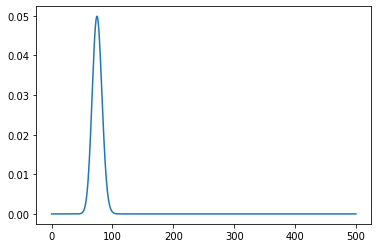

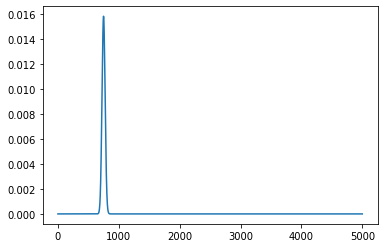

'\nfor sample size is 50, the expected amount of clicks is around 8,\nfor sample size is 500, the expected amount of clicks is around 80,\nfor sample size is 5000, the expected amount of clicks is around 800\n'

In [15]:
sample_size = [50, 500, 5000]
p = 0.15

for n in sample_size:
    dist = scipy.stats.binom(n,p)
    fig, ax = plt.subplots(1,1)
    plt.plot(range(n+1), dist.pmf(range(n+1)))
plt.show()

"""
for sample size is 50, the expected amount of clicks is around 8,
for sample size is 500, the expected amount of clicks is around 80,
for sample size is 5000, the expected amount of clicks is around 800
"""


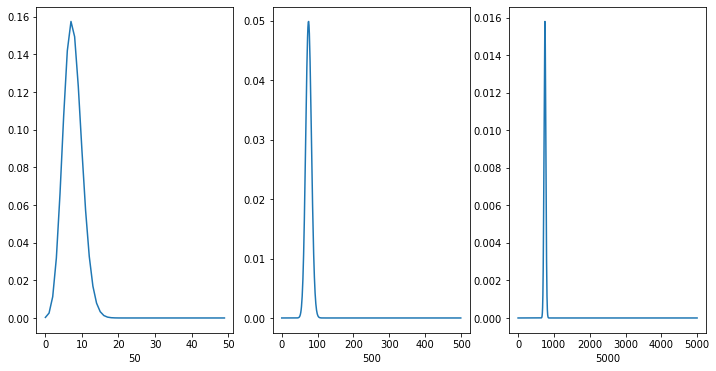

In [16]:
fig, ax = plt.subplots(1,3,figsize=(12,6))

p = 0.15
k = range(n)  # The number of succesful events in a row

n = 50
k = range(n)
ax[0].plot(k, scipy.stats.binom.pmf(n=n,p=p,k=k))
ax[0].set_xlabel("50")

n = 500
k = range(n)
ax[1].plot(k, scipy.stats.binom.pmf(n=n,p=p,k=k))
ax[1].set_xlabel("500")

n = 5000
k = range(n)
ax[2].plot(k, scipy.stats.binom.pmf(n=n,p=p,k=k))
ax[2].set_xlabel("5000")

# plt.plot(k, scipy.stats.binom.pmf(n=n,p=p,k=k))

plt.show()

In [17]:
# # N = 5000
# n = 5000
# k = range(n)  # The number of succesful events in a row

# fig, ax = plt.subplots(1, 1)

# plt.plot(k, scipy.stats.binom.pmf(n=n,p=p,k=k))

# plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

In [18]:
"""
The bigger the sample size, the lower the likelihood of many consecutive clicks

"""

'\nThe bigger the sample size, the lower the likelihood of many consecutive clicks\n\n'

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [19]:
"""
It is type of discrete distribution that is used to estimate how many
times an event can happen in a specified time. 

It has two parameters:
lambda - the rate of known occurrences
size - the shape of the returned array

It assumes:
- Independent events (one event doesnt affect the other)
- The average rate (events per time period) is constant
- Two events cannot happen at the same time

"""

# useful resource: https://projector-video-pdf-converter.datacamp.com/14568/chapter3.pdf
# useful resource: https://www.w3schools.com/python/numpy_random_poisson.asp
# useful resource: https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

'\nIt is type of discrete distribution that is used to estimate how many\ntimes an event can happen in a specified time. \n\nIt has two parameters:\nlambda - the rate of known occurrences\nsize - the shape of the returned array\n\nIt assumes:\n- Independent events (one event doesnt affect the other)\n- The average rate (events per time period) is constant\n- Two events cannot happen at the same time\n\n'

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [20]:
mean = 300
amount = 320

print("The probability of getting",amount,"visitors a day is",poisson.pmf(k=amount,mu=mean))


The probability of getting 320 visitors a day is 0.011612348610402475


#### Step 3: What is the probability of getting 60 visits?

In [21]:
mean = 300
amount = 60

print("The probability of getting",amount,"visitors a day is",poisson.pmf(k=amount,mu=mean))


The probability of getting 60 visitors a day is 2.622743762294515e-64


#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [22]:
mean = 300
arr = [poisson.pmf(k,mean) for k in range(1000)]

# for v in range(1000):
#     arr.append(poisson.pmf(k=v,mu=mean))

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

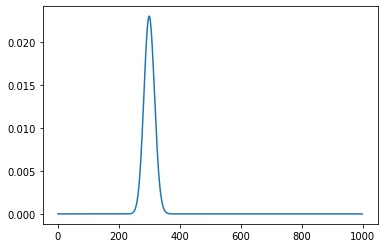

In [23]:
# run this code
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [24]:
mean = 35
stdev = 8

p30 = norm.cdf(30,loc=mean, scale=stdev)
p35 = norm.cdf(35,loc=mean, scale=stdev)

print("The probability is:",p35 - p30)

The probability is: 0.23401447095129946


#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [25]:
# mean = 35
# stdev = 8

# time_115 = norm.cdf(115,loc=mean, scale=stdev)
# time_115

# 115 / 200 * 60 = average time in minutes
# 35 = mean
# 8 / 200 ** 0.5 = number of

avg_time_min = 115/200*60

probability = 1 - norm.cdf(avg_time_min,mean,stdev)
probability

0.5249176690292472

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [26]:
mean = 200
stdev = 40

p300 = norm.cdf(300,loc=mean, scale=stdev) # = probability of less than 300
1 - p300

0.006209665325776159

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [27]:
p160 = norm.cdf(160,loc=mean, scale=stdev)
p240 = norm.cdf(240,loc=mean, scale=stdev)

print("The probability is:",p240 - p160)

The probability is: 0.6826894921370859


#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [28]:
p150 = norm.cdf(150,loc=mean, scale=stdev)

print("The probability is:",p150)

The probability is: 0.10564977366685535


#### Step 4: Find the probability that the monthly sales exceed 3000.

In [29]:
p3000 = norm.cdf(150,loc=mean, scale=stdev)

print("The probability is:",1-p3000)

The probability is: 0.8943502263331446


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [30]:
mean = 4
amount = 0
poisson.pmf(k=amount,mu=mean)

0.01831563888873418

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [31]:
amount = 1
poisson.pmf(k=amount,mu=mean)

0.07326255555493673

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [32]:
amount_1 = 2
amount_2 = 6

1 - poisson.pmf(k=amount_2,mu=mean) - poisson.pmf(k=amount_1,mu=mean)

0.7492792543231056

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [33]:
# your code here